In [3]:
giriş = """
(1) topla
(2) çıkar
(3) çarp
(4) böl
(5) karesini hesapla
(6) karekök hesapla
"""
print(giriş)
soru = input("Yapmak istediğiniz işlemin numarasını girin: ")

if soru == "1":
    sayı1 = int(input("Toplama işlemi için ilk sayıyı girin: "))
    sayı2 = int(input("Toplama işlemi için ikinci sayıyı girin: "))
    print(sayı1, "+", sayı2, "=", sayı1 + sayı2)
elif soru == "2":
    sayı3 = int(input("Çıkarma işlemi için ilk sayıyı girin: "))
    sayı4 = int(input("Çıkarma işlemi için ikinci sayıyı girin: "))
    print(sayı3, "-", sayı4, "=", sayı3 - sayı4)
elif soru == "3":
    sayı5 = int(input("Çarpma işlemi için ilk sayıyı girin: "))
    sayı6 = int(input("Çarpma işlemi için ikinci sayıyı girin: "))
    print(sayı5, "x", sayı6, "=", sayı5 * sayı6)
elif soru == "4":
    sayı7 = int(input("Bölme işlemi için ilk sayıyı girin: "))
    sayı8 = int(input("Bölme işlemi için ikinci sayıyı girin: "))
    print(sayı7, "/", sayı8, "=", sayı7 / sayı8)
elif soru == "5":
    sayı9 = int(input("Karesini hesaplamak istediğiniz sayıyı girin: "))
    print(sayı9, "sayısının karesi =", sayı9 ** 2)
elif soru == "6":
    sayı10 = int(input("Karekökünü hesaplamak istediğiniz sayıyı girin: "))
    print(sayı10, "sayısının karekökü = ", sayı10 ** 0.5)
else:
    print("Yanlış giriş.")
    print("Aşağıdaki seçeneklerden birini giriniz:", giriş)



(1) topla
(2) çıkar
(3) çarp
(4) böl
(5) karesini hesapla
(6) karekök hesapla

65 - 28 = 37


In [4]:
kaynak = "şçöğüıŞÇÖĞÜİ"
hedef  = "scoguiSCOGUI"

çeviri_tablosu = str.maketrans(kaynak, hedef)

metin = "Bildiğiniz gibi, internet üzerinde bazen Türkçe karakterleri kullanamıyoruz."

print(metin.translate(çeviri_tablosu))

Bildiginiz gibi, internet uzerinde bazen Turkce karakterleri kullanamiyoruz.


In [5]:
kaynak = "şçöğüıŞÇÖĞÜİ"
hedef  = "scoguiSCOGUI"

çeviri_tablosu = str.maketrans(kaynak, hedef)

print(çeviri_tablosu)

{351: 115, 231: 99, 246: 111, 287: 103, 252: 117, 305: 105, 350: 83, 199: 67, 214: 79, 286: 71, 220: 85, 304: 73}


In [6]:
for i in çeviri_tablosu:
    print(i, chr(i))

351 ş
231 ç
246 ö
287 ğ
252 ü
305 ı
350 Ş
199 Ç
214 Ö
286 Ğ
220 Ü
304 İ


In [18]:
for i in çeviri_tablosu.values():
    print(i, chr(i))

115 s
99 c
111 o
103 g
117 u
105 i
83 S
67 C
79 O
71 G
85 U
73 I


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#check the old format
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

confirmed_table = confirmed_df.melt(id_vars=["Province/State", "Country/Region", "Lat", "Long"], var_name="Date", value_name="Confirmed").fillna('').drop(['Lat', 'Long'], axis=1)
death_table = death_df.melt(id_vars=["Province/State", "Country/Region", "Lat", "Long"], var_name="Date", value_name="Deaths").fillna('').drop(['Lat', 'Long'], axis=1)
recovered_table = recovered_df.melt(id_vars=["Province/State", "Country/Region", "Lat", "Long"], var_name="Date", value_name="Recovered").fillna('').drop(['Lat', 'Long'], axis=1)

full_table = confirmed_table.merge(death_table).merge(recovered_table)

full_table['Date'] = pd.to_datetime(full_table['Date'])
full_table

,Province/State,Country/Region,Date,Confirmed,Deaths,Recovered
0,,Afghanistan,2020-01-22,0,0,0
1,,Albania,2020-01-22,0,0,0
2,,Algeria,2020-01-22,0,0,0
3,,Andorra,2020-01-22,0,0,0
4,,Angola,2020-01-22,0,0,0
...,...,...,...,...,...,...
36787,,Sao Tome and Principe,2020-06-15,662,12,177
36788,,Yemen,2020-06-15,844,208,79
36789,,Comoros,2020-06-15,176,2,114
36790,,Tajikistan,2020-06-15,5097,50,3503


In [5]:
# Active Case = confirmed - deaths - recovered
full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']

# replacing Mainland china with just China
full_table['Country/Region'] = full_table['Country/Region'].replace('Mainland China', 'China')

# filling missing values 
full_table[['Province/State']] = full_table[['Province/State']].fillna('')
# full_table[cases] = full_table[cases].fillna(0)
full_table

,Province/State,Country/Region,Date,Confirmed,Deaths,Recovered,Active
0,,Afghanistan,2020-01-22,0,0,0,0
1,,Albania,2020-01-22,0,0,0,0
2,,Algeria,2020-01-22,0,0,0,0
3,,Andorra,2020-01-22,0,0,0,0
4,,Angola,2020-01-22,0,0,0,0
...,...,...,...,...,...,...,...
36787,,Sao Tome and Principe,2020-06-15,662,12,177,473
36788,,Yemen,2020-06-15,844,208,79,557
36789,,Comoros,2020-06-15,176,2,114,60
36790,,Tajikistan,2020-06-15,5097,50,3503,1544


In [6]:
def get_time_series(country):
    # for some countries, data is spread over several Provinces
    if full_table[full_table['Country/Region'] == country]['Province/State'].nunique() > 1:
        country_table = full_table[full_table['Country/Region'] == country]
        country_df = pd.DataFrame(pd.pivot_table(country_table, values = ['Confirmed', 'Deaths', 'Recovered', 'Active'],
                              index='Date', aggfunc=sum).to_records())
        return country_df.set_index('Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']]
    df = full_table[(full_table['Country/Region'] == country) 
                & (full_table['Province/State'].isin(['', country]))]
    return df.set_index('Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']]


def get_time_series_province(province):
    # for some countries, data is spread over several Provinces
    df = full_table[(full_table['Province/State'] == province)]
    return df.set_index('Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']]

country = 'Turkey'
df = get_time_series(country)
if len(df) > 1 and df.iloc[-2,0] >= df.iloc[-1,0]:
    df.drop(df.tail(1).index,inplace=True)
df.tail(10)

,Confirmed,Deaths,Recovered,Active
Date,,,,
2020-06-06,169218,4669,135322,29227
2020-06-07,170132,4692,137969,27471
2020-06-08,171121,4711,141380,25030
2020-06-09,172114,4729,144598,22787
2020-06-10,173036,4746,146839,21451
2020-06-11,174023,4763,147860,21400
2020-06-12,175218,4778,149102,21338
2020-06-13,176677,4792,150087,21798
2020-06-14,178239,4807,151417,22015


In [2]:
import seaborn as sns
diamonds =sns.load_dataset('diamonds')
df=diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


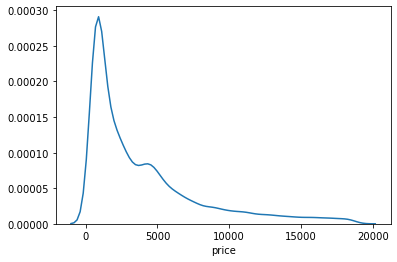

In [5]:
sns.distplot(df.price, hist=False)

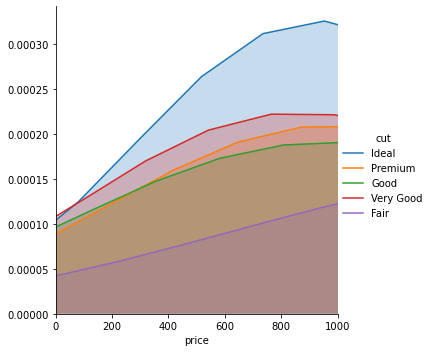

In [9]:
(sns.FacetGrid(df, hue="cut", height=5, xlim=(0,1000)).map(sns.kdeplot,"price", shade=True).add_legend())

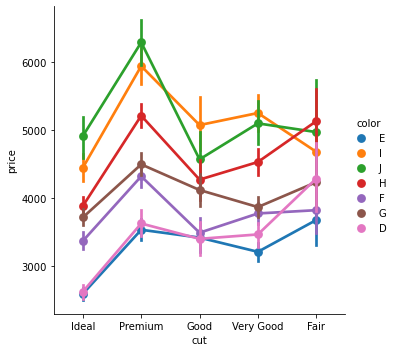

In [10]:
sns.catplot(x="cut",y="price",hue="color", kind="point",data=df)

In [11]:
import seaborn as sns
tips=sns.load_dataset("tips")
df=tips
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [14]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [15]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [16]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [17]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

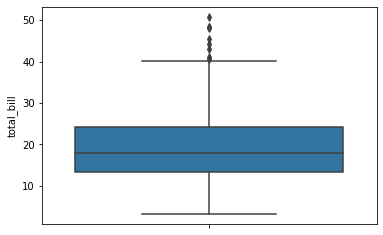

In [19]:
sns.boxplot(x=df["total_bill"], orient="v")

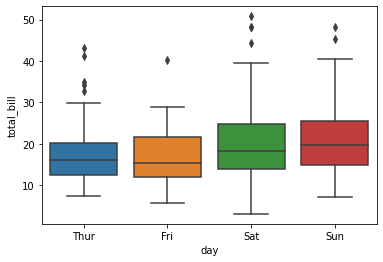

In [20]:
sns.boxplot(x="day", y="total_bill",data=df)

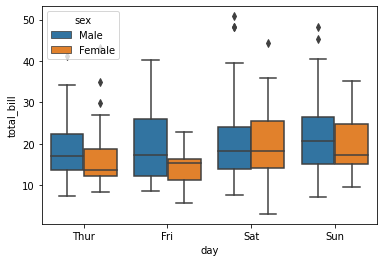

In [24]:
sns.boxplot(x="day", y="total_bill",data=df, hue="sex")

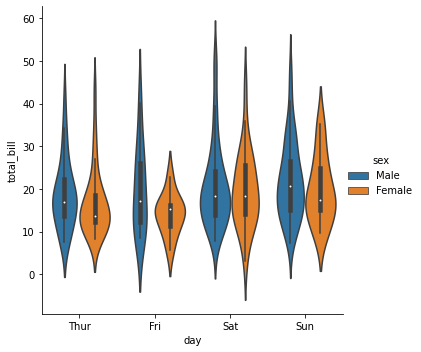

In [26]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="violin",data=df)

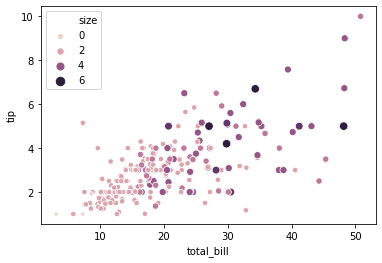

In [38]:
sns.scatterplot(y="tip", x="total_bill", hue="size",  size="size" ,data=df)

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

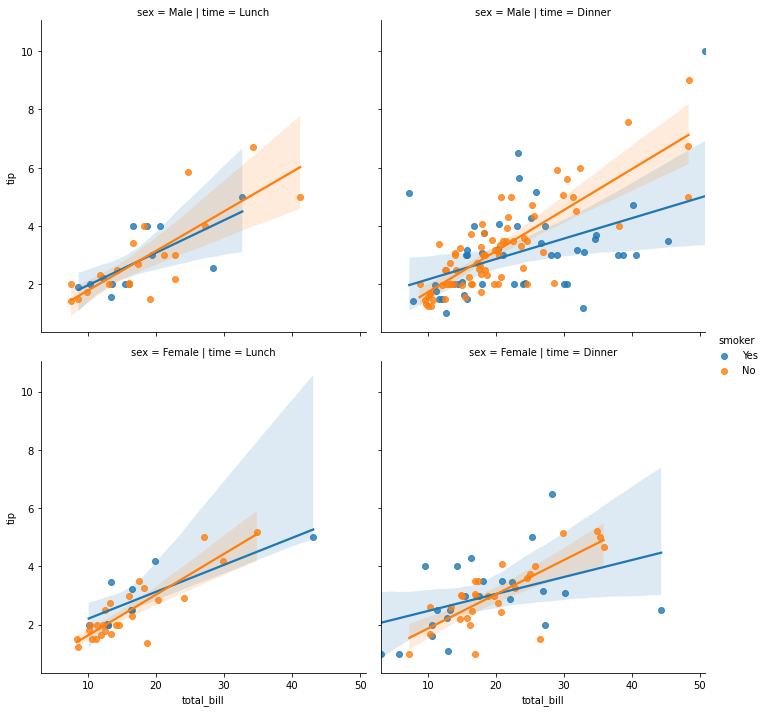

In [44]:
sns.lmplot(x="total_bill",y="tip",col="time",hue="smoker",row="sex",data=df)

In [34]:
import seaborn as sns
iris=sns.load_dataset("iris")
df=iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [28]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [30]:
import pandas as pd
from pandas import CategoricalDtype
df.species=df.species.astype(CategoricalDtype(ordered=True))
df.species

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: category
Categories (3, object): [setosa < versicolor < virginica]

In [31]:
print(df.species.head())
df.dtypes.species

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: category
Categories (3, object): [setosa < versicolor < virginica]


CategoricalDtype(categories=['setosa', 'versicolor', 'virginica'], ordered=True)

In [32]:
spec_kategori=['versicolor','setosa',  'virginica']
df.species=df.species.astype(CategoricalDtype(categories=spec_kategori))
print(df.species.head())
df.dtypes.species

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: category
Categories (3, object): [versicolor, setosa, virginica]


CategoricalDtype(categories=['versicolor', 'setosa', 'virginica'], ordered=False)

In [48]:
df.shape

(150, 5)

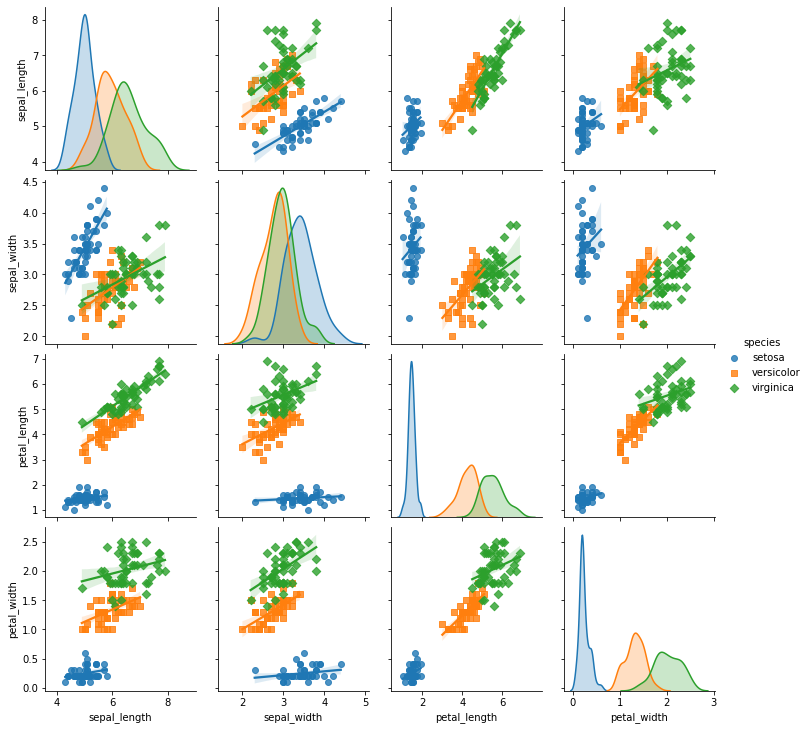

In [52]:
sns.pairplot(df, hue="species", markers=["o","s","D"], kind="reg")

In [2]:
import seaborn as sns
flights=sns.load_dataset("flights")
df=flights.copy()
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [3]:
df=df.pivot("month","year","passengers")
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


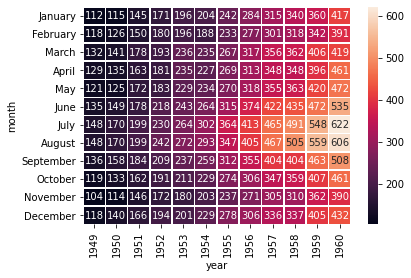

In [4]:
sns.heatmap(df, linewidths=.5, annot=True, fmt="d")

In [5]:
import seaborn as sns
fmri=sns.load_dataset("fmri")
df=fmri
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [7]:
df.shape

(1064, 5)

In [8]:
df["timepoint"].describe() #between 0-18 values it may be categorical 

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [9]:
df["signal"].describe() 

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [10]:
df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [11]:
df.groupby("signal").count() # unique values

,subject,timepoint,event,region
signal,,,,
-0.255486,1,1,1,1
-0.238474,1,1,1,1
-0.224351,1,1,1,1
-0.181241,1,1,1,1
-0.178510,1,1,1,1
...,...,...,...,...
0.455575,1,1,1,1
0.460896,1,1,1,1
0.476055,1,1,1,1


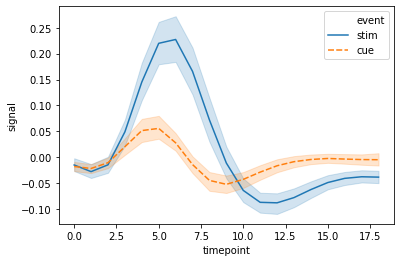

In [16]:
sns.lineplot(x="timepoint", y="signal", style="event", hue="event", data=df)

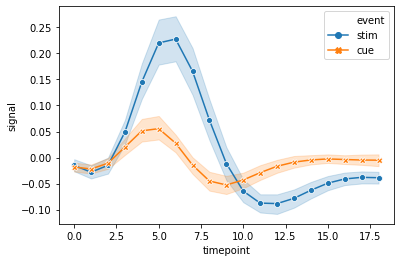

In [17]:
sns.lineplot(x="timepoint", y="signal", style="event", hue="event", data=df, markers=True, dashes=False)

In [18]:
import pandas_datareader as pr

In [21]:
df=pr.get_data_yahoo("AAPL",start="2016-01-01",end="2020-06-06")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,105.370003,102.000000,102.610001,105.349998,67649400.0,97.948441
2016-01-05,105.849998,102.410004,105.750000,102.709999,55791000.0,95.493919
2016-01-06,102.370003,99.870003,100.559998,100.699997,68457400.0,93.625145
2016-01-07,100.129997,96.430000,98.680000,96.449997,81094400.0,89.673714
2016-01-08,99.110001,96.760002,98.550003,96.959999,70798000.0,90.147873


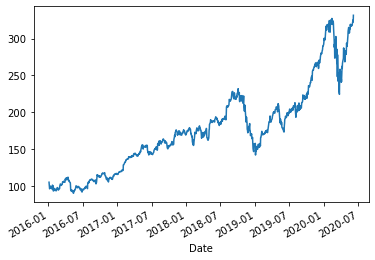

In [22]:
kapanis=df["Close"]
kapanis.plot()

In [23]:
df.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [26]:
import pandas as pd
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,105.370003,102.000000,102.610001,105.349998,67649400.0,97.948441
2016-01-05,105.849998,102.410004,105.750000,102.709999,55791000.0,95.493919
2016-01-06,102.370003,99.870003,100.559998,100.699997,68457400.0,93.625145
2016-01-07,100.129997,96.430000,98.680000,96.449997,81094400.0,89.673714
2016-01-08,99.110001,96.760002,98.550003,96.959999,70798000.0,90.147873


In [33]:
?sns.distplot

Signature:
sns.distplot(
    a,
    bins=None,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None,
)
Docstring:
Flexibly plot a univariate distribution of observations.

This function combines the matplotlib ``hist`` function (with automatic
calculation of a good default bin size) with the seaborn :func:`kdeplot`
and :func:`rugplot` functions. It can also fit ``scipy.stats``
distributions and plot the estimated PDF over the data.

Parameters
----------

a : Series, 1d-array, or list.
    Observed data. If this is a Series object with a ``name`` attribute,
    the name will be used to label the data axis.
bins : argument for matplotlib hist(), or None, optional
    Specification of hist bins. If unspecified, as reference rule is used
    that tries to find a useful default.
hist : bool, optional
    Whether